# 案例八 空气质量指数计算及分析

## 功能1.0 AQI计算

In [11]:
#线性转换函数
def cal_linear(iaqi_lo,iaqi_hi,bp_lo,bp_hi,cp):
    iaqi = (iaqi_hi - iaqi_lo) * (cp - bp_lo) / (bp_hi - bi_lo) + iaqi_lo
    return iaqi

In [13]:
#IAQI计算函数
def cal_pm_iaqi(pm_value):
    if 0 <= pm_value < 36:
        iqai = cal_linear(0,50,0,35,pm_value)
    elif 36 <= pm_value < 76:
        iaqi = cal_linear(50,100,35,75,pm_value)
    elif 76 <= pm_value < 116:
        iaqi = cal_linear(100,150,75,115,pm_value)
    elif 116 <= pm_value < 151:
        iaqi = cal_linear(150,200,115,150,pm_value)
    elif 151 <= pm_value < 251:
        iaqi = cal_linear(200,300,150,250,pm_value)
    elif 251 <= pm_value < 351:
        iaqi = cal_linear(300,400,250,350,pm_value)
    elif pm_value >= 351:
        iaqi = cal_linear(400,500,350,500,pm_value)
    return iaqi
def cal_CO_iaqi(CO_value):
    pass

In [4]:
#AQI计算函数
def cal_aqi(param_list):
    pm_value = param_list[0]
    CO_value = param_list[1]
    #计算IAQI
    pm_iaqi = cal_pm_iaqi(pm_value)
    CO_iaqi = cal_CO_iaqi(CO_value)
    #确定AQI
    iaqi_list = []
    iaqi_list.append(pm_iaqi)
    iaqi_list.append(CO_iaqi)
    
    aqi = max(iaqi_list)
    return aqi

In [3]:
def main():
    print('请输入以下信息（以空格分隔）：')
    input_str = print('(1)PM2.5 (2)CO:')
    #字符串分隔
    str_list = input_str.split(' ')
    pm_value = str_list[0]
    CO_value = str_list[1]
    #参数保存
    param_list = []
    param_list.append(pm_value)
    param_list.append(CO_value)
    #调用计算函数
    aqi_value = cal_aqi(param_list)
    
    print('空气质量指数为：{}'.format(aqi_value))

上述只是功能实现，没有完全写出来

## 功能2.0 JSON读取

JSON(JavaScript Object Notation)一种轻量级数据交换格式，利用JSON库来处理

规则如下：
* 数据保存在键值对中
* 键值对由逗号隔开
* 花括号保存键值对数据组成的**对象**
* 方括号保存键值对数据组成的数组

例如：

[{'aqi':47,'area':'北京','position_name':'万寿西宫','time_point':'2017-07-29'},
 {'aqi':63,'area':'北京','position_name':'定陵','time_point':'2017-07-29'}]

In [4]:
import json 

In [8]:
def process_json_file(filepath):
    f = open(filepath,mode = 'r',encoding = 'utf-8')
    city_list = json.load(f)
    return city_list

In [9]:
def main():
    #读取文件
    filepath = input('请输入json文件名称：')
    city_list = process_json_file(filepath)
    city_list.sort(key = lambda city: city['aqi'])
    top5 = city_list[:5]
    #写入文件
    open('top5.json',mode = 'w',encoding = 'utf-8')
    json.dump(top5,f,ensure_ascii = False)
    f.close()

## 功能3.0 CSV读取

In [15]:
import csv

In [16]:
def main():
    #读取文件
    filepath = input('请输入文件名称：')
    city_list = process_json_file(filepath)
    city_list.sort(key = lambda city: city['aqi'])
    top5 = city_list[:5]
    
    lines = []
    #第0行为列名
    lines.append(list(city_list[0].keys()))
    #将值按行存储
    for city in city_list:
        lines.append(list(city.values()))
        
    #写入文件
    open('top5.csv',mode = 'w',encoding = 'utf-8',newline = '')
    writer = csv.writer(f)
    for line in lines:
        writer.writerow(line)
    f.close()

## 功能4.0 判断文件格式

os模块：
* os.remove() 删除文件
* os.makedirs() 创建多层目录
* os.rmdir() 删除单机目录
* os.rename() 重命名文件
* os.path.isfile() 判断是否为文件
* os.path.isdir() 判断是否为目录
* os.path.join() 连接目录，如path1连接path2为path1/path2
* os.path.splitext() 将文件分割成文件名和扩展名，如分隔tmp.txt为tmp和txt
* ......

In [14]:
import os

In [18]:
def process_csv_file(filepath):
    with open(filepath,mode = 'w',encoding = 'utf-8',newline = '') as f:
            reader = csv.reader(f)
            for row in reader:
                print(','.join(row))

In [ ]:
def main():
    #读取文件
    filepath = input('请输入文件名称：')
    filename,file_ext = os.path.splitext(filepath)
    if file_ext == '.json':
        process_json_file(filepath)
    elif file_ext == '.csv':
        process_csv_file(filepath)
    else:
        print('不支持该类型文件！')
    
    
    
    city_list = process_json_file(filepath)
    city_list.sort(key = lambda city: city['aqi'])
    top5 = city_list[:5]
    #写入文件
    open('top5.json',mode = 'w',encoding = 'utf-8')
    json.dump(top5,f,ensure_ascii = False)
    f.close()

## 功能5.0 利用爬虫做实时计算
借助网络爬虫进行信息获取和处理

requests模块

* get() 函数来进行页面请求
* status_code 请求的返回状态。200表示成功，400表示失败
* text 相应内容的字符串形式，即url对应的页面内容

* 当前时间为：

In [30]:
import datetime
now_time = datetime.datetime.now()
print(now_time)

2019-03-28 08:36:41.828117


In [2]:
import requests

In [5]:
def get_html_text(url):
    r = requests.get(url, timeout = 30)
    #print(r.status_code)
    return r.text

In [37]:
def main():
    city_pinyin = input('请输入目标城市的拼音：').lower()
    url = 'http://pm25.in/' + city_pinyin
    url_text = get_html_text(url)
    
    aqi_div = '''<div class="span12 data">
        <div class="span1">
          <div class="value">
            '''
    index = url_text.find(aqi_div)
    begin_index = index + len(aqi_div)
    #这里结束索引与课程不太一致，因为不能保证当前空气质量为两位数，
    #所以结束索引改为从开始索引找到第一个空格为止，中间会包含换行符，所以再减一为止
    end_index = url_text.find(' ',begin_index)
    aqi_val = url_text[begin_index: end_index-1]
    
    print('目标城市的实时空气质量指数为：{}'.format(aqi_val))

In [40]:
main()

请输入目标城市的拼音：chengdu
200
目标城市的实时空气质量指数为：81


## 功能6.0 更高效解析HTML内容
beautifulsoup4库

基于html的DOM tree结构化解析html的内容

In [43]:
from bs4 import BeautifulSoup

In [13]:
def get_city_aqi(city_pinyin):
    url = 'http://pm25.in/' + city_pinyin
    r = requests.get(url, timeout = 30)
    soup = BeautifulSoup(r.text, 'lxml')
    div_list = soup.find_all('div', {'class':'span1'})
    
    city_aqi = []
    for i in range(8):
        div_content = div_list[i]
        caption = div_content.find('div', {'class':'caption'}).text.strip()
        value = div_content.find('div', {'class':'value'}).text.strip()
    
        city_aqi.append((caption,value))
    return city_aqi

In [55]:
def main():
    city_pinyin = input('请输入目标城市的拼音：').lower()
    
    city_aqi = get_city_aqi(city_pinyin)
    
    #print('目标城市的实时空气质量指数为：{}'.format(aqi_val))
    print(city_aqi)

In [56]:
main()

请输入目标城市的拼音：beijing
[('AQI', '49'), ('PM2.5/1h', '31'), ('PM10/1h', '48'), ('CO/1h', '0.49'), ('NO2/1h', '25'), ('O3/1h', '73'), ('O3/8h', '22'), ('SO2/1h', '3')]


## 功能7.0 获取网站所有城市AQI

In [5]:
def get_all_cities():
    url = 'http://pm25.in/'
    city_list = []
    r = requests.get(url, timeout = 30)
    soup = BeautifulSoup(r.text, 'lxml')
    #取出所有bottom的节点
    city_div = soup.find_all('div', {'class':'bottom'})[1]
    #取出所有a的节点
    city_link_list = city_div.find_all('a')
    #遍历所有城市，取出相应字符串
    for city_link in city_link_list:
        city_name = city_link.text
        city_pinyin = city_link['href'][1:]
        city_list.append((city_name, city_pinyin))
    return city_list

In [63]:
def main():
    city_list = get_all_cities()
    for city in city_list:
        city_name = city[0]
        city_pinyin = city[1]
        city_aqi = get_city_aqi(city_pinyin)
        print('{}的实时空气质量指数为：{}'.format(city_name, city_aqi))
    #print('目标城市的实时空气质量指数为：{}'.format(aqi_val))

In [65]:
main()

阿坝州的实时空气质量指数为：[('AQI', '26'), ('PM2.5/1h', '7'), ('PM10/1h', '13'), ('CO/1h', '0.53'), ('NO2/1h', '3'), ('O3/1h', '82'), ('O3/8h', '46'), ('SO2/1h', '5')]
阿克苏地区的实时空气质量指数为：[('AQI', '140'), ('PM2.5/1h', '51'), ('PM10/1h', '228'), ('CO/1h', '0.9'), ('NO2/1h', '32'), ('O3/1h', '51'), ('O3/8h', '48'), ('SO2/1h', '5')]
阿拉善盟的实时空气质量指数为：[('AQI', '102'), ('PM2.5/1h', '38'), ('PM10/1h', '151'), ('CO/1h', '0.4'), ('NO2/1h', '4'), ('O3/1h', '109'), ('O3/8h', '94'), ('SO2/1h', '8')]
阿勒泰地区的实时空气质量指数为：[('AQI', '27'), ('PM2.5/1h', '6'), ('PM10/1h', '8'), ('CO/1h', '0.6'), ('NO2/1h', '14'), ('O3/1h', '61'), ('O3/8h', '52'), ('SO2/1h', '6')]
阿里地区的实时空气质量指数为：[('AQI', '22'), ('PM2.5/1h', '3'), ('PM10/1h', '9'), ('CO/1h', '0.8'), ('NO2/1h', '32'), ('O3/1h', '59'), ('O3/8h', '43'), ('SO2/1h', '18')]
安康的实时空气质量指数为：[('AQI', '81'), ('PM2.5/1h', '46'), ('PM10/1h', '110'), ('CO/1h', '1.17'), ('NO2/1h', '46'), ('O3/1h', '26'), ('O3/8h', '23'), ('SO2/1h', '39')]
安庆的实时空气质量指数为：[('AQI', '35'), ('PM2.5/1h', '15'), ('PM10/

大同的实时空气质量指数为：[('AQI', '35'), ('PM2.5/1h', '13'), ('PM10/1h', '34'), ('CO/1h', '0.7'), ('NO2/1h', '16'), ('O3/1h', '83'), ('O3/8h', '58'), ('SO2/1h', '15')]
大兴安岭地的实时空气质量指数为：[('AQI', '0'), ('PM2.5/1h', '0'), ('PM10/1h', '0'), ('CO/1h', '0.0'), ('NO2/1h', '0'), ('O3/1h', '0'), ('O3/8h', '0'), ('SO2/1h', '0')]
大兴安岭地区的实时空气质量指数为：[('AQI', '33'), ('PM2.5/1h', '9'), ('PM10/1h', '31'), ('CO/1h', '0.25'), ('NO2/1h', '7'), ('O3/1h', '85'), ('O3/8h', '65'), ('SO2/1h', '12')]
达州的实时空气质量指数为：[('AQI', '94'), ('PM2.5/1h', '58'), ('PM10/1h', '136'), ('CO/1h', '1.16'), ('NO2/1h', '71'), ('O3/1h', '9'), ('O3/8h', '5'), ('SO2/1h', '8')]
德宏州的实时空气质量指数为：[('AQI', '117'), ('PM2.5/1h', '88'), ('PM10/1h', '156'), ('CO/1h', '1.15'), ('NO2/1h', '42'), ('O3/1h', '66'), ('O3/8h', '22'), ('SO2/1h', '12')]
德阳的实时空气质量指数为：[('AQI', '139'), ('PM2.5/1h', '106'), ('PM10/1h', '160'), ('CO/1h', '0.83'), ('NO2/1h', '57'), ('O3/1h', '54'), ('O3/8h', '17'), ('SO2/1h', '18')]
德州的实时空气质量指数为：[('AQI', '138'), ('PM2.5/1h', '105'), ('PM10/

河源的实时空气质量指数为：[('AQI', '55'), ('PM2.5/1h', '38'), ('PM10/1h', '44'), ('CO/1h', '1.35'), ('NO2/1h', '31'), ('O3/1h', '52'), ('O3/8h', '46'), ('SO2/1h', '7')]
菏泽的实时空气质量指数为：[('AQI', '78'), ('PM2.5/1h', '42'), ('PM10/1h', '103'), ('CO/1h', '0.75'), ('NO2/1h', '19'), ('O3/1h', '105'), ('O3/8h', '76'), ('SO2/1h', '12')]
贺州的实时空气质量指数为：[('AQI', '60'), ('PM2.5/1h', '42'), ('PM10/1h', '53'), ('CO/1h', '0.75'), ('NO2/1h', '28'), ('O3/1h', '21'), ('O3/8h', '18'), ('SO2/1h', '8')]
红河州的实时空气质量指数为：[('AQI', '91'), ('PM2.5/1h', '67'), ('PM10/1h', '98'), ('CO/1h', '0.9'), ('NO2/1h', '11'), ('O3/1h', '116'), ('O3/8h', '99'), ('SO2/1h', '7')]
淮安的实时空气质量指数为：[('AQI', '75'), ('PM2.5/1h', '37'), ('PM10/1h', '97'), ('CO/1h', '0.84'), ('NO2/1h', '31'), ('O3/1h', '111'), ('O3/8h', '61'), ('SO2/1h', '24')]
淮北的实时空气质量指数为：[('AQI', '77'), ('PM2.5/1h', '56'), ('PM10/1h', '87'), ('CO/1h', '0.67'), ('NO2/1h', '20'), ('O3/1h', '114'), ('O3/8h', '65'), ('SO2/1h', '17')]
怀化的实时空气质量指数为：[('AQI', '51'), ('PM2.5/1h', '35'), ('PM10/

平顶山的实时空气质量指数为：[('AQI', '59'), ('PM2.5/1h', '41'), ('PM10/1h', '65'), ('CO/1h', '0.85'), ('NO2/1h', '20'), ('O3/1h', '112'), ('O3/8h', '75'), ('SO2/1h', '15')]
平度的实时空气质量指数为：[('AQI', '124'), ('PM2.5/1h', '79'), ('PM10/1h', '196'), ('CO/1h', '1.05'), ('NO2/1h', '24'), ('O3/1h', '113'), ('O3/8h', '67'), ('SO2/1h', '17')]
平凉的实时空气质量指数为：[('AQI', '66'), ('PM2.5/1h', '22'), ('PM10/1h', '79'), ('CO/1h', '0.4'), ('NO2/1h', '6'), ('O3/1h', '111'), ('O3/8h', '77'), ('SO2/1h', '4')]
萍乡的实时空气质量指数为：[('AQI', '76'), ('PM2.5/1h', '55'), ('PM10/1h', '96'), ('CO/1h', '3.76'), ('NO2/1h', '35'), ('O3/1h', '22'), ('O3/8h', '13'), ('SO2/1h', '58')]
普洱的实时空气质量指数为：[('AQI', '143'), ('PM2.5/1h', '109'), ('PM10/1h', '137'), ('CO/1h', '1.1'), ('NO2/1h', '23'), ('O3/1h', '134'), ('O3/8h', '44'), ('SO2/1h', '13')]
莆田的实时空气质量指数为：[('AQI', '57'), ('PM2.5/1h', '31'), ('PM10/1h', '61'), ('CO/1h', '0.54'), ('NO2/1h', '24'), ('O3/1h', '113'), ('O3/8h', '56'), ('SO2/1h', '7')]
濮阳的实时空气质量指数为：[('AQI', '97'), ('PM2.5/1h', '50'), ('P

随州的实时空气质量指数为：[('AQI', '63'), ('PM2.5/1h', '43'), ('PM10/1h', '73'), ('CO/1h', '0.7'), ('NO2/1h', '16'), ('O3/1h', '91'), ('O3/8h', '41'), ('SO2/1h', '11')]
宿迁的实时空气质量指数为：[('AQI', '63'), ('PM2.5/1h', '44'), ('PM10/1h', '67'), ('CO/1h', '0.72'), ('NO2/1h', '30'), ('O3/1h', '99'), ('O3/8h', '62'), ('SO2/1h', '12')]
苏州的实时空气质量指数为：[('AQI', '75'), ('PM2.5/1h', '54'), ('PM10/1h', '86'), ('CO/1h', '0.66'), ('NO2/1h', '63'), ('O3/1h', '69'), ('O3/8h', '37'), ('SO2/1h', '19')]
宿州的实时空气质量指数为：[('AQI', '73'), ('PM2.5/1h', '39'), ('PM10/1h', '94'), ('CO/1h', '0.53'), ('NO2/1h', '9'), ('O3/1h', '116'), ('O3/8h', '54'), ('SO2/1h', '10')]
塔城地区的实时空气质量指数为：[('AQI', '60'), ('PM2.5/1h', '12'), ('PM10/1h', '67'), ('CO/1h', '0.7'), ('NO2/1h', '24'), ('O3/1h', '72'), ('O3/8h', '45'), ('SO2/1h', '5')]
泰安的实时空气质量指数为：[('AQI', '93'), ('PM2.5/1h', '67'), ('PM10/1h', '133'), ('CO/1h', '0.73'), ('NO2/1h', '44'), ('O3/1h', '97'), ('O3/8h', '75'), ('SO2/1h', '22')]
太仓的实时空气质量指数为：[('AQI', '49'), ('PM2.5/1h', '26'), ('PM10/1h

诸暨的实时空气质量指数为：[('AQI', '0'), ('PM2.5/1h', '0'), ('PM10/1h', '0'), ('CO/1h', '0.0'), ('NO2/1h', '0'), ('O3/1h', '0'), ('O3/8h', '0'), ('SO2/1h', '0')]
驻马店的实时空气质量指数为：[('AQI', '63'), ('PM2.5/1h', '44'), ('PM10/1h', '65'), ('CO/1h', '0.43'), ('NO2/1h', '15'), ('O3/1h', '91'), ('O3/8h', '53'), ('SO2/1h', '8')]
株洲的实时空气质量指数为：[('AQI', '67'), ('PM2.5/1h', '48'), ('PM10/1h', '67'), ('CO/1h', '1.12'), ('NO2/1h', '30'), ('O3/1h', '27'), ('O3/8h', '21'), ('SO2/1h', '18')]
淄博的实时空气质量指数为：[('AQI', '89'), ('PM2.5/1h', '50'), ('PM10/1h', '126'), ('CO/1h', '0.57'), ('NO2/1h', '21'), ('O3/1h', '120'), ('O3/8h', '98'), ('SO2/1h', '20')]
自贡的实时空气质量指数为：[('AQI', '74'), ('PM2.5/1h', '53'), ('PM10/1h', '92'), ('CO/1h', '0.65'), ('NO2/1h', '19'), ('O3/1h', '78'), ('O3/8h', '29'), ('SO2/1h', '8')]
资阳的实时空气质量指数为：[('AQI', '71'), ('PM2.5/1h', '49'), ('PM10/1h', '89'), ('CO/1h', '0.76'), ('NO2/1h', '54'), ('O3/1h', '52'), ('O3/8h', '17'), ('SO2/1h', '17')]
遵义的实时空气质量指数为：[('AQI', '46'), ('PM2.5/1h', '27'), ('PM10/1h', '45'

## 功能8.0 实时AQI的保存

In [10]:
import csv
import requests
from bs4 import BeautifulSoup

In [15]:
#与前面不同，这里要去掉最终输出列表中的caption内容
def get_city_aqi(city_pinyin):
    url = 'http://pm25.in/' + city_pinyin
    r = requests.get(url, timeout = 30)
    soup = BeautifulSoup(r.text, 'lxml')
    div_list = soup.find_all('div', {'class':'span1'})
    
    city_aqi = []
    for i in range(8):
        div_content = div_list[i]
        caption = div_content.find('div', {'class':'caption'}).text.strip()
        value = div_content.find('div', {'class':'value'}).text.strip()
    
        #city_aqi.append((caption,value))
        city_aqi.append(value)
    return city_aqi

In [21]:
def main():
    city_list = get_all_cities()
    #创建表头
    header = ['City', 'AQI', 'PM2.5/1h', 'PM10/1h', 'CO/1h', 'NO2/1h', 'O3/1h', 'O3/8h', 'SO2/1h']
    #分行写入
    with open('cities_aqi.csv',mode = 'w',encoding = 'utf-8',newline = '') as f:
        writer = csv.writer(f)
        writer.writerow(header)
        for i, city in enumerate(city_list):
            if (i % 50 == 0) & (i != 0):
                print('已处理{}条数据（共{}条数据）。'.format(i, len(city_list)))
            city_name = city[0]
            city_pinyin = city[1]
            city_aqi = get_city_aqi(city_pinyin)
            row = [city_name] + city_aqi
            writer.writerow(row)

In [22]:
main()

已处理0条数据（共375条数据）。
已处理50条数据（共375条数据）。
已处理100条数据（共375条数据）。
已处理150条数据（共375条数据）。
已处理200条数据（共375条数据）。
已处理250条数据（共375条数据）。
已处理300条数据（共375条数据）。
已处理350条数据（共375条数据）。


## 功能9.0 简单的数据处理和分析
Pandsa库

In [18]:
import pandas as pd

In [25]:
def main():
    aqi_data = pd.read_csv('cities_aqi.csv')
    print(aqi_data['City'].head(10))

In [26]:
main()

0      阿坝州
1    阿克苏地区
2     阿拉善盟
3    阿勒泰地区
4     阿里地区
5       安康
6       安庆
7       鞍山
8       安顺
9       安阳
Name: City, dtype: object


## 功能10.0 数据清洗和可视化


In [27]:
def main():
    aqi_data = pd.read_csv('cities_aqi.csv')
    clean_aqi_data = aqi_data[aqi_data['AQI'] > 0]
    print(clean_aqi_data.sort_values(by='AQI').head(10))

In [28]:
main()

      City  AQI  PM2.5/1h  PM10/1h  CO/1h  NO2/1h  O3/1h  O3/8h  SO2/1h
115    黄南州    9         0        0   0.80      17      0      0      25
177   林芝地区   18         4       16   0.35       6     51     35       3
310  锡林郭勒盟   18         6       17   0.40      23     33     34      16
4     阿里地区   18         7        9   0.90      34     26     25      11
307     咸宁   19         8       18   0.78      17      6      6       3
90      海口   22        13       21   0.48      12     33     40       3
31      昌都   23         9       22   0.60      10     36     42       4
268   塔城地区   23        14       22   1.70      12     36     38       3
357     湛江   26        15       21   0.58       6     49     51       3
239     三亚   26        18       23   0.70      14     26     39       5


In [31]:
import matplotlib.pyplot as plt

In [34]:
#默认设置中的字体不支持中文输出，需要重新设置
plt.rcParams['font.sans-serif'] = ['SimHei']
#有时负号也会存在问题
plt.rcParams['axes.unicode_minus'] = False

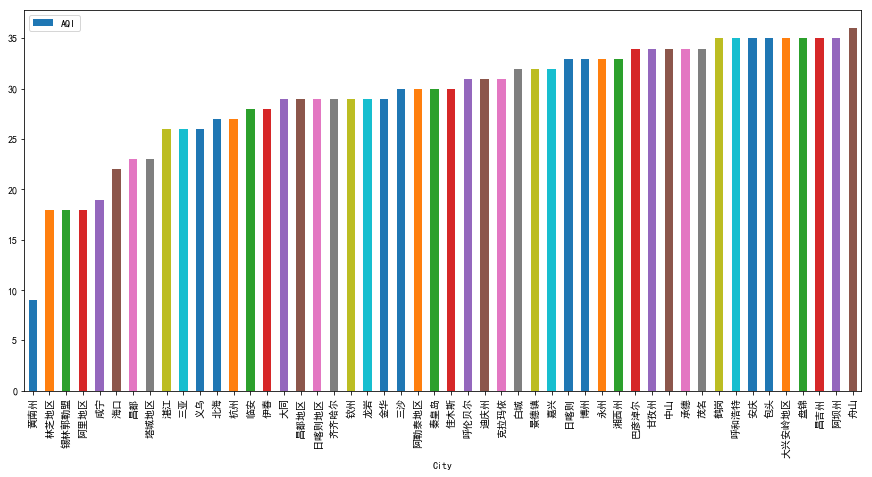

In [48]:
aqi_data = pd.read_csv('cities_aqi.csv')
clean_aqi_data = aqi_data[aqi_data['AQI'] > 0]
top50 = clean_aqi_data.sort_values(by='AQI').head(50)
top50.plot('City', 'AQI', 'bar', figsize = (15,7))
#可以加fc参数该颜色
plt.show()

In [42]:
?top50.plot